In [1]:
import pandas as pd #veriyi yüklemek, temizlemek, dönüştürmek, analiz etmek ve görselleştirmek için kullanılır 
from sklearn.model_selection import train_test_split #veri kümesini eğitim ve test setlerine ayırmak için kullanılır 
from sklearn.linear_model import LinearRegression #linear regresyon kütüphanesi
from sklearn.preprocessing import OneHotEncoder #kategorik verileri sayısal formata dönüştürmek için 
from sklearn.compose import ColumnTransformer #farklı veri türlerini uygun bir şekilde işler
from sklearn.pipeline import Pipeline #veri ön işleme ve model eğitim adımlarını sırayla uygular
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #regresyon modeli performansını ölçtürmek için 
import matplotlib.pyplot as plt #veri görsellestirmek için
import seaborn as sns #istatiksel veri görselleştirmek için 
from sklearn.impute import SimpleImputer  #eksik verileri doldurmak için 
import numpy as np #sayısal hesaplamalar için 

In [2]:
data =pd.read_csv('higher_ed_employee_salaries.csv') #csv formatındaki dosyayı okumak için 
data.head() #genel bir ön inceleme yapmak için

,Name,School,Job Description,Department,Earnings,Year
0,Don Potter,University of Akron,Assistant Lecturer,Social Work,2472.00,2019
1,Emily Potter,The Ohio State University,Administrative Assistant 3,Arts and Sciences | Chemistry and Biochemistry...,48538.02,2022
2,Carol Jean Potter,The Ohio State University,Associate Professor-Clinical,Pediatrics,22722.80,2013
3,Kim Potter,The Ohio State University,"Manager 4, Compliance",Legal Affairs | Compliance,170143.44,2022
4,Graham Potter,Miami University,Building and Grounds Assistant,"Assoc VP Housing,Dining,Rec,Bus Svc",3075.20,2012


In [3]:
df = pd.DataFrame(data)  #data kelimesini df olarak kısaltmak için

In [4]:
df = df.dropna(subset=['Earnings']) #maas sütununa göre işlem yapmak için

In [5]:
X = df.drop(columns=['Earnings', 'Name']) #'Earnings' ve 'Name' sütunları hariç diğer sütunları X değişkenine atamak için  
y = df['Earnings'] #'Earnings' sütununun verilerini y adlı bir değişkene atamak için  

In [6]:
numeric_features = ['Year'] #sütununu sayısal özellikler listesine dahil etmek için 
categorical_features = ['School', 'Job Description', 'Department'] #sütunlarını kategorik özellikler listesine dahil etmek için

numeric_transformer = Pipeline(steps=[ #sayısal veriler için bir dizi işlem adımını sırasıyla uygulayan bir Pipeline oluşturur
    ('imputer', SimpleImputer(strategy='mean')) #eksik verileri sütunların ortalaması ile doldurmak için SimpleImputer'ı Pipeline'a bir adım olarak ekler
])

categorical_transformer = Pipeline(steps=[ #kategorik veriler için bir dizi işlem adımını sırasıyla uygulayan bir Pipeline oluşturur
    ('imputer', SimpleImputer(strategy='most_frequent')), #eksik kategorik verileri en sık görülen değer ile doldurmak için SimpleImputer'ı Pipeline'a bir adım olarak ekler
    ('onehot', OneHotEncoder(handle_unknown='ignore')) #kategorik verileri OneHotEncoder kullanarak bilinmeyen kategorilerle karşılaşıldığında hata vermemek için handle_unknown='ignore' parametresiyle Pipeline'a ekler
])

preprocessor = ColumnTransformer( #sayısal ve kategorik veriler için farklı dönüşüm adımlarını uygular
    transformers=[ #ColumnTransformer içinde kullanılacak dönüşüm adımlarını ve hangi sütunlara uygulanacaklarını belirtir
        ('num', numeric_transformer, numeric_features), # sayısal için numeric kısmı dönüştürür
        ('cat', categorical_transformer, categorical_features) # kategorik için ise katagorik kısmı dönüştürür
    ])

In [7]:
lr = Pipeline(steps=[ # linear regresyon modelini oluşturur
    ('preprocessor', preprocessor), #veri ön işleme adımlarını (sayısal ve kategorik dönüşümler) modelin eğitim sürecine dahil eder 
    ('regressor', LinearRegression()) #veriyi işledikten sonra doğrusal regresyon modelini uygular
])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=22) #test ve eğitim kümesini ayırdım veri kümesinin %40 ını test kümesi olarak aldım 
#baslangıc noktası olarak 22 yi atadım 

In [9]:
lr.fit(X_train, y_train) #LinearRegression modelini X_train ve y_train verisiyle eğitir 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['School', 'Job Description',
                                                   'Department'])])),
                ('regressor', LinearRegression())])

In [10]:
y_pred = lr.predict(X_test)  #eğitimli LinearRegression modelini kullanarak X_test verisiyle tahminler yapar ve sonuçları y_pred değişkenine atar

In [11]:
print(f"Tahmin edilen değerler: {y_pred}") #tahmin edilen değerleri yazdırır

Tahmin edilen değerler: [45459.90226245   714.47425852 98300.73386843 ... 91206.26182294
 93142.18220616 37157.91922623]


In [12]:
mse = mean_squared_error(y_test, y_pred) #y_test ve y_pred arasındaki ortalama kare hatayı hesaplar
mae = mean_absolute_error(y_test, y_pred) # y_test ve y_pred arasındaki ortalama mutlak hatayı hesaplar
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #y_test ve y_pred arasındaki ortalama kare hatanın kök ortalama kare hatasını hesaplar
mape = (abs((y_test - y_pred) / y_test).mean()) * 100 #y_test ve y_pred arasındaki ortalama mutlak yüzdesel hatayı hesaplar
r2 = r2_score(y_test, y_pred) #y_test ve y_pred arasındaki determinasyon katsayısı (R²)'yı hesaplar ve modelin açıklama gücünü ölçer
print(f"Mean Squared Error (MSE): {mse}") #ortalama kare hata değerini ekrana yazdırır
print(f"Mean Absolute Error (MAE): {mae}") #ortalama mutlak hata değerini ekrana yazdırır
print(f"Root Mean Squared Error (RMSE): {rmse}") #ortalama kare hatanın kök ortalama kare hata değerini ekrana yazdırır
print(f"Mean Absolute Percentage Error (MAPE): {mape}%") #ortalama mutlak yüzdesel hata değerini ekrana yazdırır
print(f"R-squared (R²): {r2}") #hesaplanan (R²) değerini ekrana yazdırır ve modelin açıklama gücünü gösterir

Mean Squared Error (MSE): 1332017843.6773233
Mean Absolute Error (MAE): 18422.02986312517
Root Mean Squared Error (RMSE): 36496.819637844106
Mean Absolute Percentage Error (MAPE): 2664.5809444774764%
R-squared (R²): 0.6284617636362193


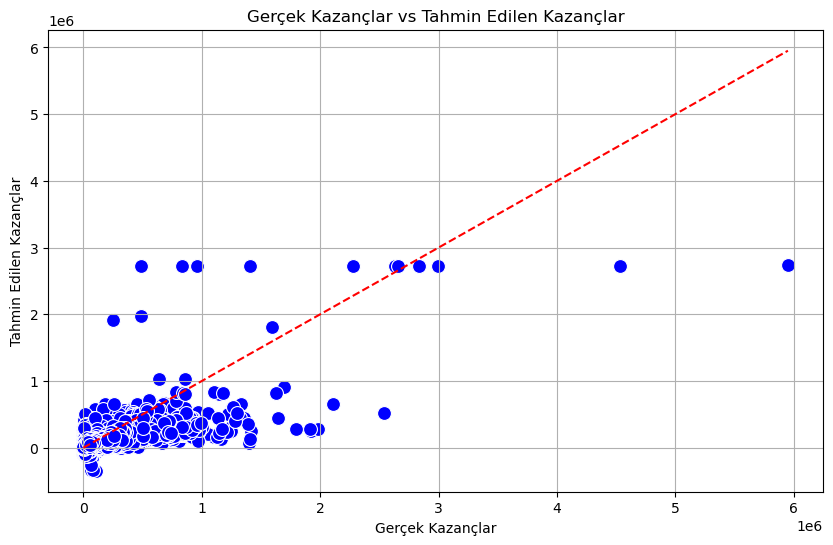

In [13]:
plt.figure(figsize=(10, 6)) #grafiğin boyutlarını ayarlar
sns.scatterplot(x=y_test, y=y_pred,color='blue', s=100) #y_test ve y_pred arasındaki ilişkiyi gösteren bir dağılım grafiği oluşturur ve noktaların boyutunu 100 olarak ayarlar 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  #y_test ve y_pred değerler arasındaki ideal doğrusal ilişkiyi göstermek için kırmızı kesik çizgi çizer
plt.xlabel('Gerçek Kazançlar')  #grafikteki x eksenine 'Gerçek Kazançlar' etiketini ekler 
plt.ylabel('Tahmin Edilen Kazançlar')   #grafikteki y eksenine 'Tahmin Edilen Kazançlar' etiketini ekler 
plt.title('Gerçek Kazançlar vs Tahmin Edilen Kazançlar') #grafiğe 'Gerçek Kazançlar vs Tahmin Edilen Kazançlar' başlığını ekler
plt.grid(True) # grafiğe ızgara çizgileri ekler
plt.show() # grafiği ekranda görüntüler